<H1><center> Measure granularity using cellpose segmentation </center></H1>
<p> The goal here is to calculate granularity from input image. The measure will be used late for training a bayes' model. 

In [1]:
import matplotlib.pyplot as plt
import tifffile as tfi
import numpy as np
from PIL import Image
import plotly.express as px
from skimage.filters import threshold_local
from scipy.ndimage.morphology import binary_opening
from skimage import io, filters, measure, color, img_as_ubyte
import skimage.morphology as sm
from skimage.segmentation import watershed
from skimage import measure
from skimage.exposure import rescale_intensity
import os
import pandas as pd
from scipy.ndimage.morphology import binary_fill_holes
import base64
from datetime import datetime
import timeit
import glob
import seaborn as sns
os.chdir(r'F:\HAB_2\PrinzScreen\Deploy')
from utils import AIPS_module as ai
from utils import AIPS_functions as af
from utils import AIPS_granularity as ag
from utils import AIPS_file_display as afd
from utils import AIPS_cellpose as AC

F:\Gil\anaconda\envs\pymc3_cellpose_dash\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *
F:\Gil\anaconda\envs\pymc3_cellpose_dash\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
path_input = r'F:\HAB_2\PrinzScreen\Deploy\testData'
pathOut = r'F:\HAB_2\PrinzScreen\Deploy\out'
file = 'crop_exp001_13DKO_2-1.tif'
AIPS_pose_object = AC.AIPS_cellpose(Image_name=file, path=path_input, model_type="cyto", channels=[0, 0])
img = AIPS_pose_object.cellpose_image_load()
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img)
compsite = afd.Compsite_display(input_image=img, mask_roi=mask)


gran = ag.GRANULARITY(image=img, mask=mask)
granData = gran.loopLabelimage(start_kernel=2, end_karnel=7, kernel_size=7)
granOriginal, _ = gran.featuresTable(features=['label', 'centroid'])
granData["classLabel"] = 1
granData.to_csv(os.path.join(pathOut,'granularity.csv'))
Intensity, Kernel = ag.MERGE().meanIntensity(granData, group=1)


#compsiteImage  = compsite.display_image_label(table=table, font_select="arial.ttf", font_size=24, contour=True, intensity=2,label_draw = 'area')

In [31]:
Intensity

[1.0, 0.7983027080000955, 0.7533039073022766, 0.706822344028193]

<AxesSubplot:xlabel='kernel', ylabel='Signal intensity (ratio)'>

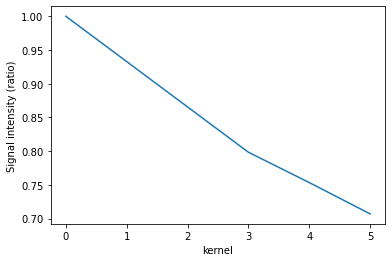

In [30]:
df = pd.DataFrame({"kernel":Kernel,"Signal intensity (ratio)":Intensity})
sns.lineplot(data=df, x="kernel", y="Signal intensity (ratio)")


In [ ]:
fig2 = linePlot.get_figure()
fig2.savefig(os.path.join(outPath, 'intensityPerKernel.png'))

In [4]:
compsiteImage  = compsite.display_image_label(table=table, font_select="arial.ttf", font_size=24, contour=True, intensity=2,label_draw = 'area')

AttributeError: 'DataFrame' object has no attribute 'column'

In [25]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

<AxesSubplot:xlabel='area', ylabel='Count'>

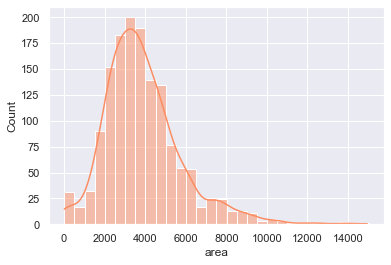

In [28]:
sns.set()
sns.histplot(data = table, x = 'area', kde = True,color = sns.color_palette("Set2")[1],binwidth = 500)

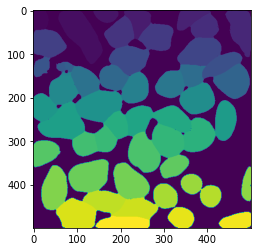

In [2]:
path_input = r'F:\HAB_2\PrinzScreen\Deploy\testData'
file = 'exp001_13DKO_2-1.tif'

AIPS_pose_object = AC.AIPS_cellpose(Image_name = file, path= path_input, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()

mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,200:700,200:700])
plt.imshow(mask)

In [22]:
table

,area,centroid-0,centroid-1
label,,,
1,1435,22.708711,16.668293
2,6644,54.277845,110.885611
3,1323,12.146636,167.991686
4,2471,24.797653,241.995548
5,2107,18.306122,358.981965
6,4241,43.906626,476.283424
7,2674,39.046746,394.685116
8,3402,53.074368,199.647266
9,3816,61.829140,284.396226


In [3]:
dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
PIL_image = dipObject.display_image_label( table = table, font_select = "arial.ttf", font_size = 24)
plt.imshow(PIL_image)

TypeError: display_image_label() missing 1 required positional argument: 'contour'

In [24]:
# remove cell index 41
table.drop([41,50,46], inplace=True)
#np.unique(mask.ravel())
table

,area,centroid-0,centroid-1
label,,,
1,1435,22.708711,16.668293
2,6644,54.277845,110.885611
3,1323,12.146636,167.991686
4,2471,24.797653,241.995548
5,2107,18.306122,358.981965
6,4241,43.906626,476.283424
7,2674,39.046746,394.685116
8,3402,53.074368,199.647266
9,3816,61.829140,284.396226


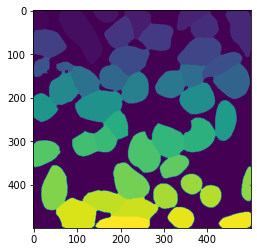

In [20]:
labels = [31,30,32]
for label in labels:
    mask[mask==label]=0
plt.imshow(mask)

In [3]:
# test Object removal function
path_input = r'F:\HAB_2\PrinzScreen\Deploy\testData'
file = 'exp001_13DKO_2-1.tif'
AIPS_pose_object = AC.AIPS_cellpose(Image_name = file, path= path_input, model_type="cyto", channels=[0,0])
img = AIPS_pose_object.cellpose_image_load()
mask, table = AIPS_pose_object.cellpose_segmantation(image_input=img[0,200:700,200:700])
# dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
# PIL_image = dipObject.display_image_label( table = table, font_select = "arial.ttf", font_size = 24)
# plt.imshow(PIL_image)

In [4]:
dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
counter = dipObject.draw_ROI_contour(channel=None)

In [5]:
temp = dipObject.display_image_label( table = table, font_select = "arial.ttf", font_size = 24,contour=True,intensity = 2)

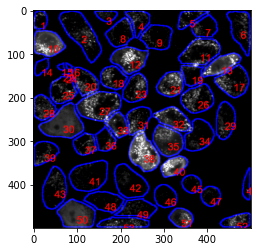

In [6]:
plt.imshow(temp)

In [8]:
temp.save("img1.png","PNG")

In [10]:
objectidx = table.loc[table['area'] < 500,:].index.tolist() 

In [11]:
mask, table = AIPS_pose_object.removeObjects(objectList = objectidx)
dipObject = afd.Compsite_display(input_image=img[0,200:700,200:700], mask_roi=mask)
finalImage = dipObject.draw_ROI_contour(channel=None)
temp = dipObject.display_image_label(table = table, font_select = "arial.ttf", font_size = 24,contour=True,intensity = 3)
plt.imshow(temp)

TypeError: cannot unpack non-iterable NoneType object

In [2]:
import pandas as pd
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageDraw,ImageFont
import seaborn as sns
#sns.set()
import arviz as az
import pymc3 as pm
print(pm.__version__)
import theano.tensor as tt
import patsy

import os
import re
import glob
import random
# import plotnine
from sklearn import preprocessing
from tqdm import tqdm

import plotly.express as px

from skimage import measure, restoration,morphology
from skimage import io, filters, measure, color, img_as_ubyte
from skimage.draw import disk
from skimage import measure, restoration,morphology

RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
os.chdir(r'F:\HAB_2\PrinzScreen\Deploy')
from utils import AIPS_module as ai
from utils import AIPS_functions as af
from utils import AIPS_granularity as ag


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


3.11.5


In [3]:
path_input =  r'F:\HAB_2\PrinzScreen\Deploy\unitest'
files = glob.glob(pathname=path_input+"\*.csv")

#dfMergeFinel = pd.read_csv(os.path.join(path_input,file))
dfMergeFinel = ag.MERGE().mergeTable(tableInput_name_list = files)
dfMergeFinelFitelrd = ag.MERGE().calcDecay(dfMergeFinel,5)

In [4]:
rate = dfMergeFinelFitelrd.intensity.values
y_0 = dfMergeFinelFitelrd.classLabel.values
with pm.Model() as model_logistic_basic:
    a = pm.Normal('a',0,10)
    b = pm.Normal('b',0,10)
    mu = a + pm.math.dot(rate,b)
    theta = pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    bd = pm.Deterministic('bd',-a/b)
    yl = pm.Bernoulli('yl',theta,observed = y_0)
    trace = pm.sample(500, tune=500, target_accept=0.99,random_seed=RANDOM_SEED)
idata = az.from_pymc3(trace, model=model_logistic_basic)

F:\Gil\anaconda\envs\pymc3_cellpose_dash\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, a]


Sampling 4 chains for 500 tune and 500 draw iterations (2_000 + 2_000 draws total) took 41 seconds.
The number of effective samples is smaller than 25% for some parameters.


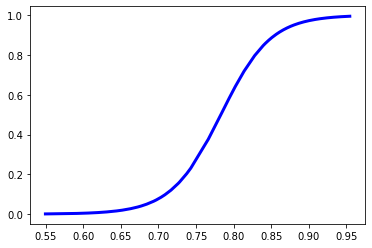

In [5]:
theta = trace['theta'].mean(0)
idx = np.argsort(rate)
plt.plot(rate[idx],theta[idx],color ='b',lw=3)

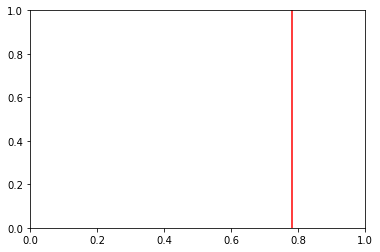

In [6]:
plt.axvline(trace['bd'].mean(),ymax=1,color = 'r')

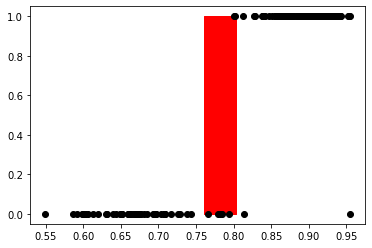

In [7]:
bd_hdi = pm.hdi(trace['bd'])
plt.fill_betweenx([0,1],bd_hdi[0],bd_hdi[1], color = 'r')
plt.plot(rate,y_0,'o',color = 'k')

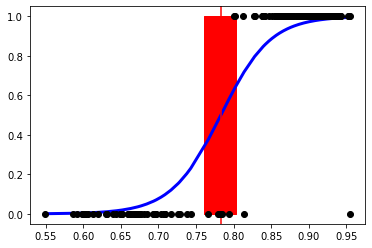

In [8]:
theta = trace['theta'].mean(0)
idx = np.argsort(rate)
fig, ax = plt.subplots()
ax.plot(rate[idx],theta[idx],color ='b',lw=3)
ax.axvline(trace['bd'].mean(),ymax=1,color = 'r')
bd_hdi = pm.hdi(trace['bd'])
ax.fill_betweenx([0,1],bd_hdi[0],bd_hdi[1], color = 'r')
ax.plot(rate,y_0,'o',color = 'k')


<AxesSubplot:>

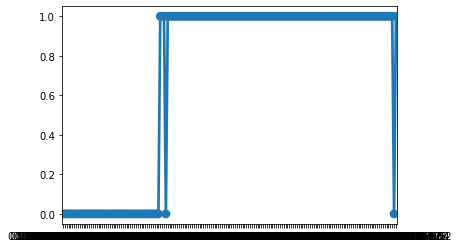

In [22]:
sns.pointplot(x =rate,  y = y_0, errorbars = None)

In [19]:
rate

array([0.8924626 , 0.81380428, 0.89172094, 0.90924562, 0.88621301,
       0.85940938, 0.92070635, 0.81296649, 0.66217078, 0.89952204,
       0.77894432, 0.91847291, 0.92133919, 0.92039241, 0.85878541,
       0.90195524, 0.91044072, 0.68425763, 0.60335391, 0.89766089,
       0.91661047, 0.70731557, 0.87757964, 0.91886577, 0.69245488,
       0.69620571, 0.90553487, 0.9211085 , 0.83954902, 0.94104878,
       0.63115368, 0.80092961, 0.66955095, 0.89127155, 0.95354987,
       0.91445362, 0.88952351, 0.87578446, 0.95437613, 0.73754264,
       0.74297269, 0.87458841, 0.66773841, 0.66300414, 0.61953035,
       0.92117184, 0.80210118, 0.89238643, 0.91807726, 0.90717493,
       0.7661914 , 0.90965558, 0.89979234, 0.63935981, 0.59793155,
       0.88239991, 0.89656606, 0.93013171, 0.89090799, 0.67687738,
       0.90994015, 0.90034529, 0.86097073, 0.87579545, 0.84665551,
       0.59154894, 0.92278295, 0.60647375, 0.83771235, 0.88513263,
       0.88796851, 0.58630934, 0.65902772, 0.88975488, 0.82782

In [25]:
from matplotlib.backends.backend_pdf import PdfPages
path_input = r'F:\HAB_2\PrinzScreen\Deploy\unitest'
with PdfPages(os.path.join(path_input,'multipage_pdf.pdf')) as pdf:
    idx = np.argsort(rate)
    plt.figure(figsize=(3, 3))
    plt.plot(rate[idx],theta[idx],color ='b',lw=3)
    plt.axvline(trace['bd'].mean(),ymax=1,color = 'r')
    bd_hdi = pm.hdi(trace['bd'])
    plt.fill_betweenx([0,1],bd_hdi[0],bd_hdi[1], color = 'r')
    plt.plot(rate,y_0,'o',color = 'k')
    pdf.savefig()
    plt.close()

In [27]:
from matplotlib.backends.backend_pdf import PdfPages
path_input = r'F:\HAB_2\PrinzScreen\Deploy\unitest'
with PdfPages(os.path.join(path_input,'multipage_pdf.pdf')) as pdf:
    plt.figure(figsize=(3, 3))
    plt.title('Trace Plot')
    az.plot_trace(trace,figsize = (12,6),compact= True)
    pdf.savefig()
    plt.close()

    idx = np.argsort(rate)
    plt.figure(figsize=(3, 3))
    plt.title('Boundery plot')
    plt.plot(rate[idx],theta[idx],color ='b',lw=3)
    plt.axvline(trace['bd'].mean(),ymax=1,color = 'r')
    bd_hdi = pm.hdi(trace['bd'])
    plt.fill_betweenx([0,1],bd_hdi[0],bd_hdi[1], color = 'r')
    plt.plot(rate,y_0,'o',color = 'k')
    pdf.savefig()
    plt.close()
    
    

    
    

Got error No model on context stack. trying to find log_likelihood in translation.
F:\Gil\anaconda\envs\pymc3_cellpose_dash\lib\site-packages\arviz\data\io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


<Figure size 216x216 with 0 Axes>

<Figure size 216x216 with 0 Axes>

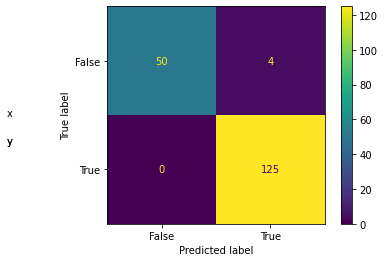

In [5]:
from sklearn import metrics 

rate = dfMergeFinelFitelrd.intensity.values
y_0 = dfMergeFinelFitelrd.classLabel.values


def classify(n,thold):
    mu = trace['a'].mean() + trace['b'].mean() * n
    prob = 1 /(1  + np.exp(-mu))
    return prob, prob > thold
rate = dfMergeFinelFitelrd.intensity.values
td = 0.5
prob,prediction = classify(rate,td)

confusion_matrix = metrics.confusion_matrix(np.array(dfMergeFinelFitelrd.classLabel.values,dtype = int), np.where(prediction,1,0)) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.text(0.01, 0.5, "x", fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.01, 0.4, "y", fontsize=10, transform=plt.gcf().transFigure)
plt.text(0.01, 0.4, "y", fontsize=10, transform=plt.gcf().transFigure)
plt.show() 





In [18]:
trace['b'].mean()

31.215097768574996

In [15]:
trace['b'].mean()

31.215097768574996

In [6]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_0
y_pred = np.where(prediction==True,1,0)
print ('{} \n\n {}'.format(y_true,y_pred))
 

[1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0] 

 [1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1
 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0]


In [9]:
x = precision_recall_fscore_support(y_true, y_pred, average='macro')

In [12]:
np.round(x[0],2)

0.984